In [1]:
%matplotlib notebook
import numpy as np, pylab as plt

# Demonstrating the Central Limit Theorem
The Central Limit Theorem states, among other things, that if you add enough (unbiased) random variables together, the sum converges to a Gaussian distribution.  Here, we demonstrate that.

First, we draw some random variables in a uniform (i.e. non-Gaussian) distribution:

<IPython.core.display.Javascript object>


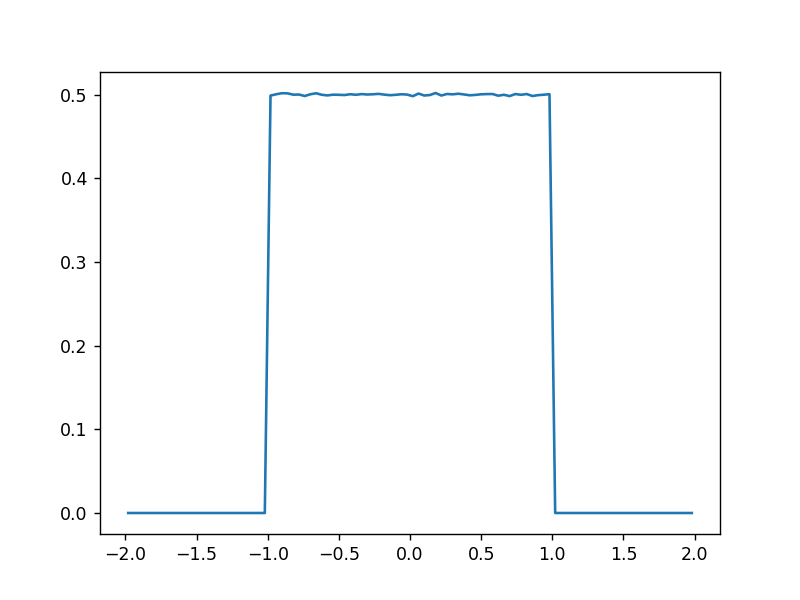

In [13]:
d = np.random.uniform(-1,1,size=int(2**24))
hist,bins = np.histogram(d, range=(-2,2), bins=100, normed=True)
plt.figure()
plt.plot(0.5*(bins[:-1]+bins[1:]), hist)
plt.show()

Next, we show that, as we average over different numbers of these uniformly drawn samples, we get a distribution that starts to look more Gaussian, although its width narrows as we average over more and more samples.

<IPython.core.display.Javascript object>


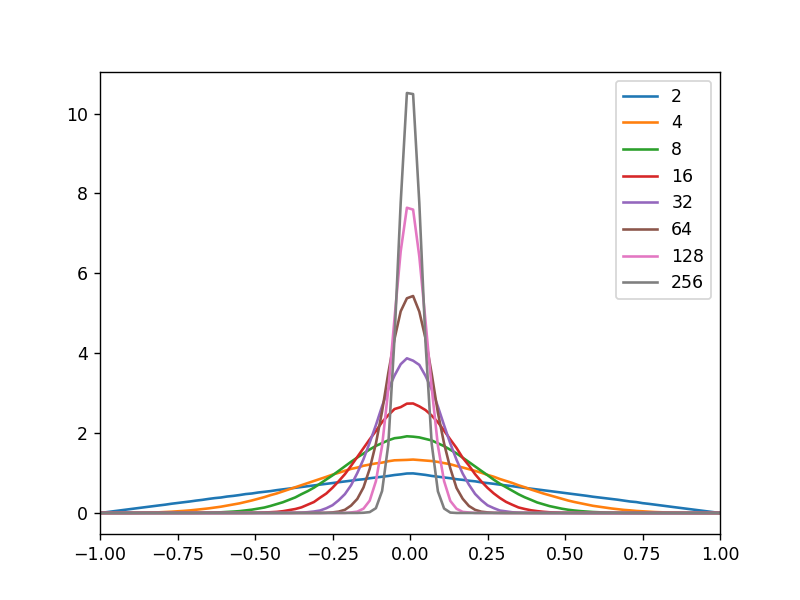

In [17]:
plt.figure()
for N in range(1,9):
    d.shape = (-1,int(2**N))
    davg = np.average(d,axis=1)
    hist,bins = np.histogram(davg, range=(-2,2), bins=200, normed=True)
    plt.plot(0.5*(bins[:-1]+bins[1:]), hist, label=str(2**N))
plt.xlim(-1,1)
plt.legend()
plt.show()

Finally, we check to see if the scaling of width with the number of samples averaged obeys
the second key result of the Central Limit Theorem.  This result states that the sum should only grow as $\sqrt{N}$ with the number of samples summed over.  Equivalently, for an average,
the error should scale as $\sqrt{N}/N = 1/\sqrt{N}$.  

Below, we undo this predicted scaling by multiplying $\sqrt{N}$ back in.  If the Central Limit Theorem is correct, all the distributions should be of the same width and should converge to the analytic form of a Gaussian:
\begin{equation}
f(x) = A\cdot e^{\frac{-(x-\mu)^2}{2\sigma^2}},
\end{equation}
where $A,\mu$, and $\sigma$ are the amplitude, mean, and standard deviation, respectively.

<IPython.core.display.Javascript object>


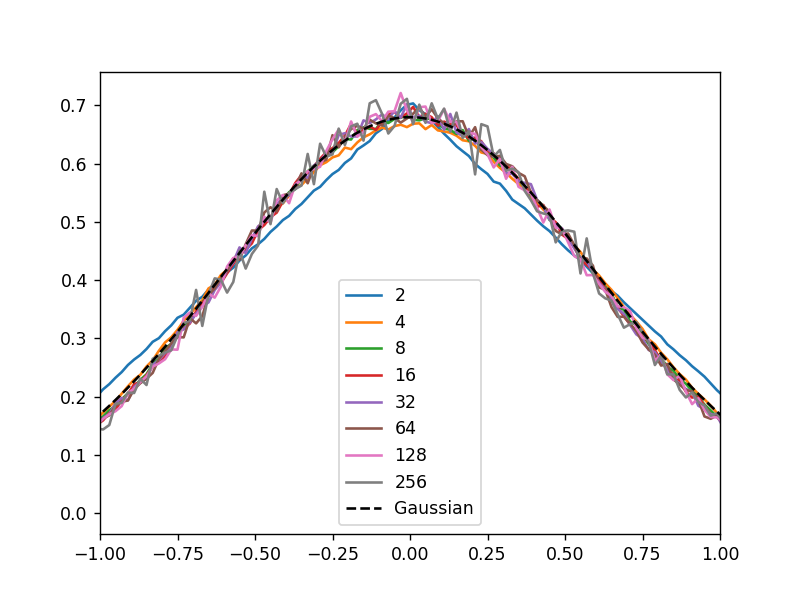

In [25]:
plt.figure()
for N in range(1,9):
    d.shape = (-1,int(2**N))
    davg = np.average(d,axis=1) * np.sqrt(2**N)
    hist,bins = np.histogram(davg, range=(-2,2), bins=200, normed=True)
    plt.plot(0.5*(bins[:-1]+bins[1:]), hist, label=str(2**N))
x = 0.5*(bins[:-1]+bins[1:])
plt.plot(x, .68*np.exp(-x**2/(2*.6**2)), 'k--', label='Gaussian')
plt.xlim(-1,1)
plt.legend()
plt.show()

# Showing How Noise Beats Down

The Central Limit Theorem is a powerful result that makes our scientific lives much easier.  For a large number of events (and in radio, we have a *lot* of photons), our statistics are Gaussian.  When we try to measure a quantity (flux, intensity, power, or otherwise), we can average measurements to beat down noise.

A valuable plot for tracking the level of noise in your measurement is called an ``Allen Variance Test'', where you track the residual noise level in your measurement as a function of how many data points you have averaged.

<IPython.core.display.Javascript object>


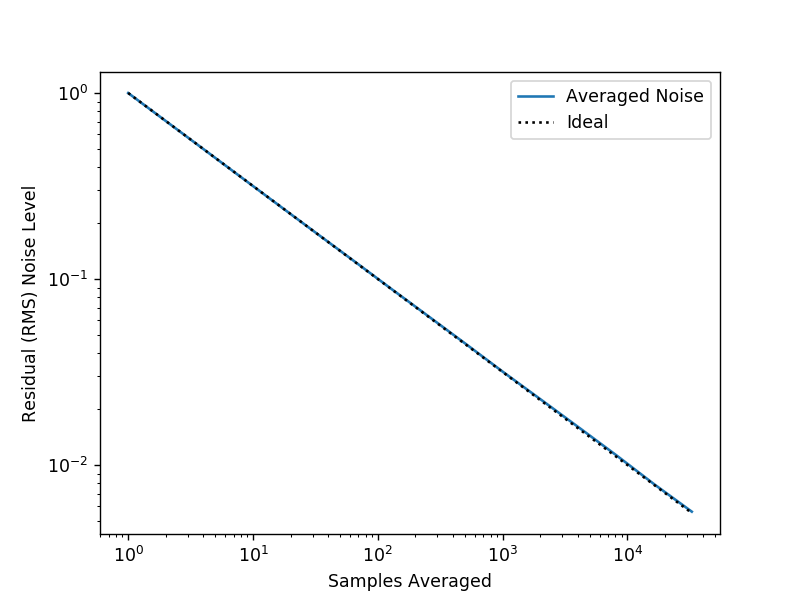

In [32]:
d = np.random.normal(size=int(2**24))
x,y = [], []
plt.figure()
for N in range(0,16):
    d.shape = (-1,int(2**N))
    davg = np.average(d,axis=1)
    drms = np.sqrt(np.average(np.abs(davg)**2))
    x.append(2**N)
    y.append(drms)
plt.loglog(x, y, label='Averaged Noise')
plt.loglog(x, np.array(x)**-.5, 'k:', label='Ideal')
plt.legend()
plt.ylabel('Residual (RMS) Noise Level')
plt.xlabel('Samples Averaged')
plt.show()

Sometimes your data integrate down as noise for a while, but then bottom out on a quantity.  Allen Variance tests show this vividly.

<IPython.core.display.Javascript object>


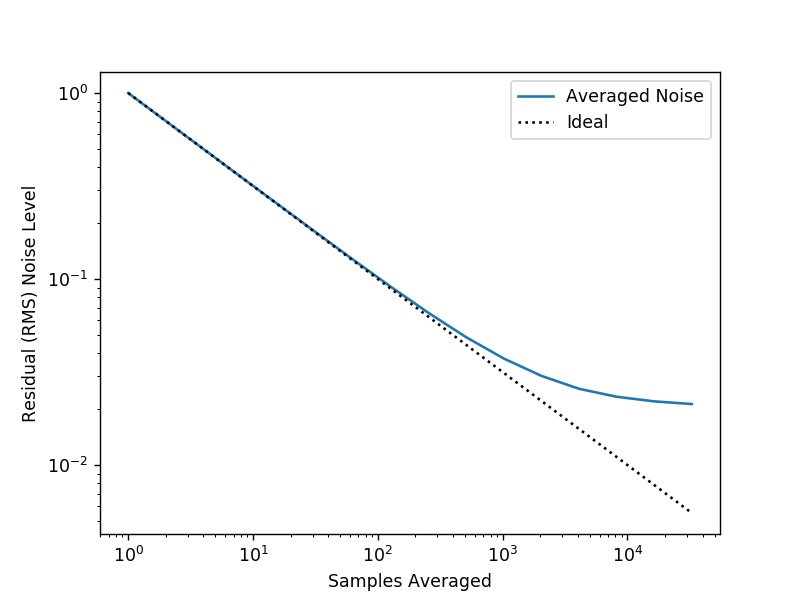

In [34]:
d_bias = np.random.normal(size=int(2**24)) + 2e-2
x,y = [], []
plt.figure()
for N in range(0,16):
    d_bias.shape = (-1,int(2**N))
    davg = np.average(d_bias,axis=1)
    drms = np.sqrt(np.average(np.abs(davg)**2))
    x.append(2**N)
    y.append(drms)
plt.loglog(x, y, label='Averaged Noise')
plt.loglog(x, np.array(x)**-.5, 'k:', label='Ideal')
plt.legend()
plt.ylabel('Residual (RMS) Noise Level')
plt.xlabel('Samples Averaged')
plt.show()

Some types of fluctuations don't average down, though.  The classic example is ``flicker'' noise, which can be centered around zero, but have a period longer than your averaging window.

<IPython.core.display.Javascript object>


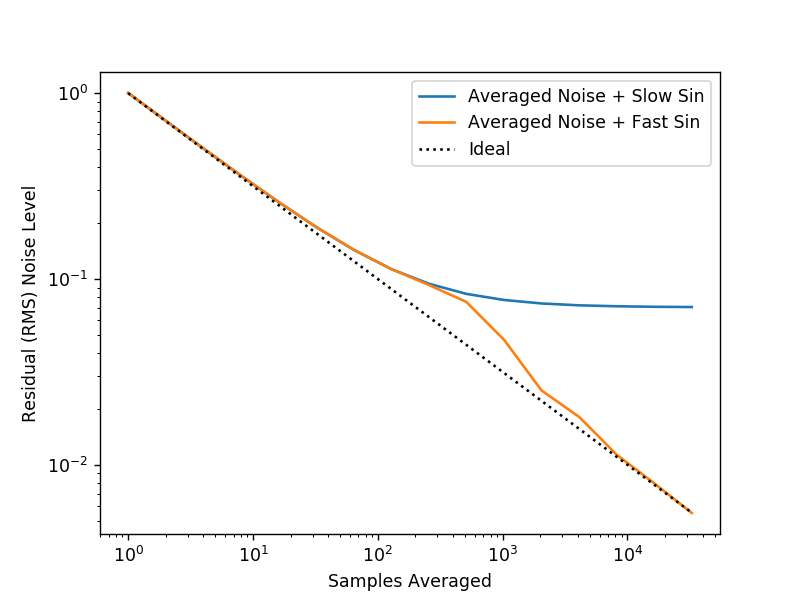

In [52]:
d_flicker = np.random.normal(size=int(2**24))
d_flicker1 = d_flicker + .1 * np.sin(np.linspace(0,2*np.pi,d_flicker.size))
d_flicker2 = d_flicker + .1 * np.sin(np.linspace(0,20000*np.pi,d_flicker.size))
x,y1,y2 = [], [], []
plt.figure()
for N in range(0,16):
    d_flicker1.shape = (-1,int(2**N))
    d_flicker2.shape = (-1,int(2**N))
    davg1 = np.average(d_flicker1,axis=1)
    davg2 = np.average(d_flicker2,axis=1)
    drms1 = np.sqrt(np.average(np.abs(davg1)**2))
    drms2 = np.sqrt(np.average(np.abs(davg2)**2))
    x.append(2**N)
    y1.append(drms1)
    y2.append(drms2)
plt.loglog(x, y1, label='Averaged Noise + Slow Sin')
plt.loglog(x, y2, label='Averaged Noise + Fast Sin')
plt.loglog(x, np.array(x)**-.5, 'k:', label='Ideal')
plt.legend()
plt.ylabel('Residual (RMS) Noise Level')
plt.xlabel('Samples Averaged')
plt.show()